<a href="https://colab.research.google.com/github/valucomvaz/listadeplanes/blob/main/Chat_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

In [ ]:
with open('result.json', 'r') as file:
  data = json.loads('\n'.join(file.readlines()))

data['messages'][:2]

[{'id': 107516,
  'type': 'message',
  'date': '2023-12-02T18:51:06',
  'date_unixtime': '1701553866',
  'from': 'Valu 🎸🎹',
  'from_id': 'user1612774433',
  'text': 'Ahii va',
  'text_entities': [{'type': 'plain', 'text': 'Ahii va'}]},
 {'id': 107517,
  'type': 'message',
  'date': '2023-12-02T18:51:20',
  'date_unixtime': '1701553880',
  'from': 'Alee Herasimiuk',
  'from_id': 'user469888786',
  'text': 'Ahh',
  'text_entities': [{'type': 'plain', 'text': 'Ahh'}]}]

In [ ]:
messages = data['messages']
VALU_ID = 'user1612774433'
ALEE_ID = 'user469888786'

Alee envió 15533 mensajes. (44%)
Valu envió 20032 mensajes. (56%)


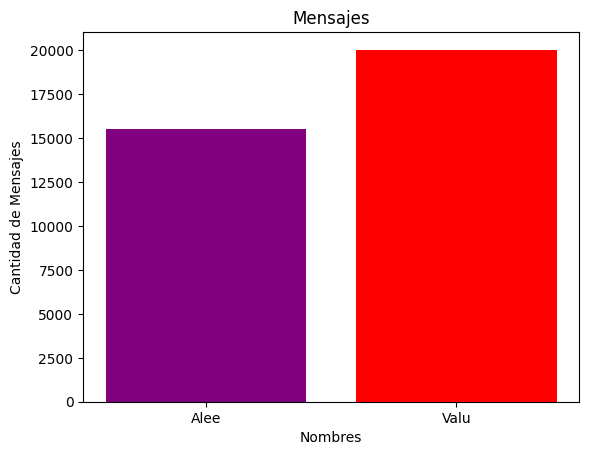

In [ ]:
counter = {
    "valu": 0,
    "alee": 0,
    "other": 0 # Service chats
}

for message in messages:
  if message['type'] == 'message':
    if message['from_id'] == VALU_ID:
      counter['valu'] += 1
    else:
      counter['alee'] += 1
  else:
    counter['other'] += 1

total = counter['valu'] + counter['alee']

print(f"Alee envió {counter['alee']} mensajes. ({round(counter['alee'] / total * 100)}%)")
print(f"Valu envió {counter['valu']} mensajes. ({round(counter['valu'] / total * 100)}%)")

names = ['Alee', 'Valu']
count = [counter['alee'], counter['valu']]

plt.bar(names, count, color=['purple', 'red'])
plt.xlabel('Nombres')
plt.ylabel('Cantidad de Mensajes')
plt.title('Mensajes')
plt.show()

Valu envió 69253 palabras. (52%)
Alee envió 63197 palabras. (48%)


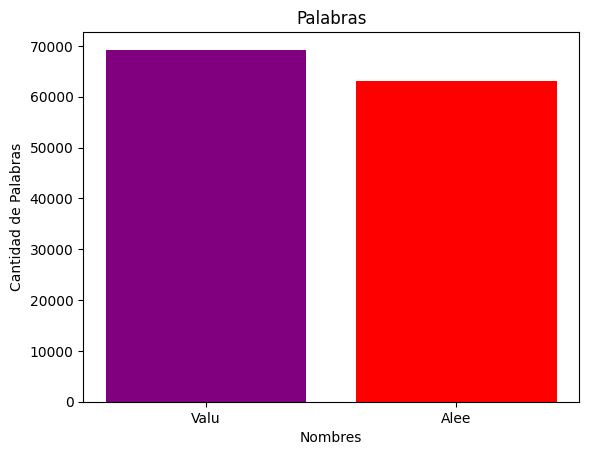

In [ ]:
word_counter = {
    VALU_ID: 0,
    ALEE_ID: 0,
}

for message in messages:
  if message['type'] == 'message':
    sender = message['from_id']
    if type(message['text']) != list:
      word_counter[sender] += len(message['text'].split(' '))

total = word_counter[VALU_ID] + word_counter[ALEE_ID]

print(f"Valu envió {word_counter[VALU_ID]} palabras. ({round(word_counter[VALU_ID] / total * 100)}%)")
print(f"Alee envió {word_counter[ALEE_ID]} palabras. ({round(word_counter[ALEE_ID] / total * 100)}%)")

names = ['Valu', 'Alee']
count = [word_counter[VALU_ID], word_counter[ALEE_ID]]

plt.bar(names, count, color=['purple', 'red'])
plt.xlabel('Nombres')
plt.ylabel('Cantidad de Palabras')
plt.title('Palabras')
plt.show()

El día con la mayor cantidad de mensajes fue: 2024-01-15 con 1698 mensajes
El día con la menor cantidad de mensajes fue: 2023-12-03 con 29 mensajes


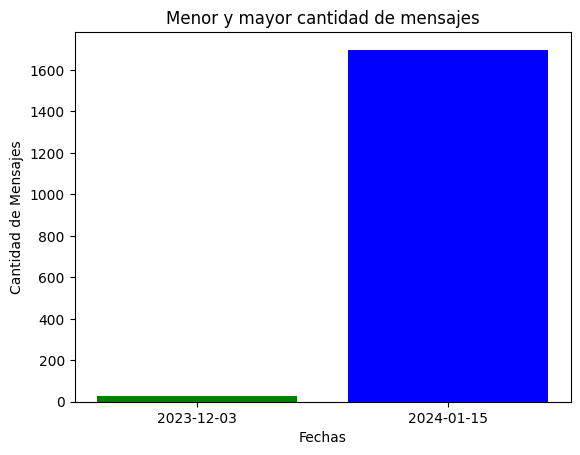

In [ ]:
date_format = '%Y-%m-%dT%H:%M:%S'

messages_by_date = {}

for message in messages:
  date_obj = datetime.strptime(message['date'], date_format).date()
  if messages_by_date.get(date_obj):
    messages_by_date[date_obj] += 1
  else:
    messages_by_date[date_obj] = 1


max = None
min = None
for key in messages_by_date.keys():
  if not max or messages_by_date[key] > messages_by_date[max]:
    max = key
  if not min or messages_by_date[key] < messages_by_date[min]:
    min = key

print(f"El día con la mayor cantidad de mensajes fue: {max} con {messages_by_date[max]} mensajes")
print(f"El día con la menor cantidad de mensajes fue: {min} con {messages_by_date[min]} mensajes")

names = ['2023-12-03', '2024-01-15']
count = [messages_by_date[min], messages_by_date[max]]

plt.bar(names, count, color=['green', 'blue'])
plt.xlabel('Fechas')
plt.ylabel('Cantidad de Mensajes')
plt.title('Menor y mayor cantidad de mensajes')
plt.show()

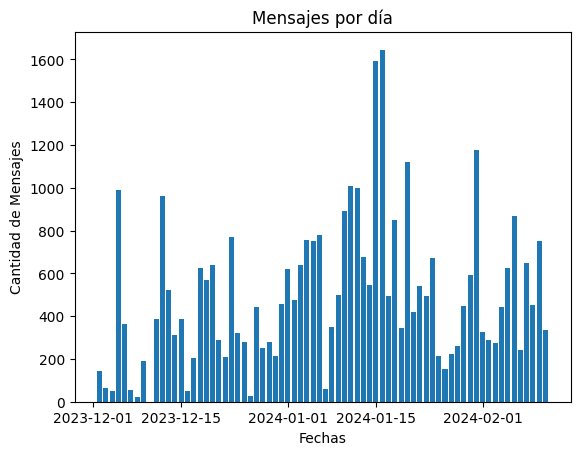

In [ ]:
plt.bar(messages_by_date.keys(), messages_by_date.values())
plt.xlabel('Fechas')
plt.ylabel('Cantidad de Mensajes')
plt.title('Mensajes por día')
plt.show()

In [ ]:
avg = round(sum(messages_by_date.values()) / len(messages_by_date.keys()))
print(f"El promedio de mensajes es {avg} por día")

El promedio de mensajes es 501 por día


El día con la mayor cantidad de mensajes fue: 2024-01-16 con 1645 mensajes
El día con la menor cantidad de mensajes fue: 2023-12-08 con 21 mensajes


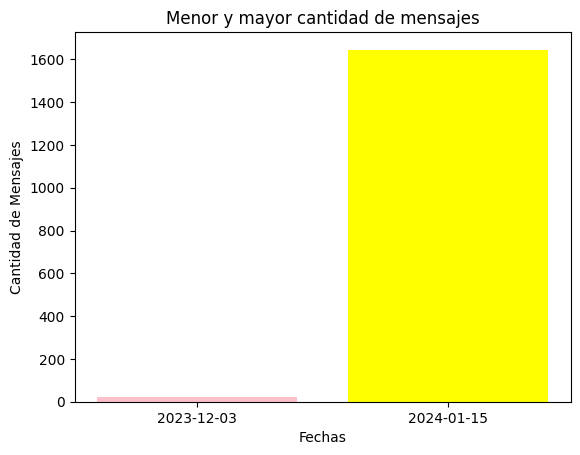

In [ ]:
# Same as before with correction of 4hs
date_format = '%Y-%m-%dT%H:%M:%S'

messages_by_date = {}

for message in messages:
  date_obj = datetime.strptime(message['date'], date_format)
  date_with_4hs_more = (date_obj + timedelta(hours=4)).date()
  if messages_by_date.get(date_with_4hs_more):
    messages_by_date[date_with_4hs_more] += 1
  else:
    messages_by_date[date_with_4hs_more] = 1


max = None
min = None
for key in messages_by_date.keys():
  if not max or messages_by_date[key] > messages_by_date[max]:
    max = key
  if not min or messages_by_date[key] < messages_by_date[min]:
    min = key

print(f"El día con la mayor cantidad de mensajes fue: {max} con {messages_by_date[max]} mensajes")
print(f"El día con la menor cantidad de mensajes fue: {min} con {messages_by_date[min]} mensajes")

names = ['2023-12-03', '2024-01-15']
count = [messages_by_date[min], messages_by_date[max]]

plt.bar(names, count, color=['pink', 'yellow'])
plt.xlabel('Fechas')
plt.ylabel('Cantidad de Mensajes')
plt.title('Menor y mayor cantidad de mensajes')
plt.show()

In [ ]:
# Most used sticker

sticker_counter = {}

for message in messages:
  if message.get('media_type') == 'sticker':
    file = message['thumbnail']
    if sticker_counter.get(file):
      sticker_counter[file] += 1
    else:
      sticker_counter[file] = 1

max = None
for key in sticker_counter.keys():
  if not max or sticker_counter[key] > sticker_counter[max]:
    max = key



In [ ]:
!rm -rf stickers/ &> /dev/null
!unzip stickers.zip &> /dev/null

Con 54 usos, El sticker más usado es: 



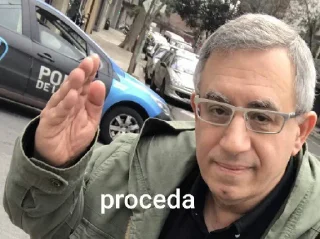

In [ ]:
print(f"Con {sticker_counter[max]} usos, El sticker más usado es: \n")
Image(max)

# Análisis de chat

In [ ]:
!pip install es-lemmatizer
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 70.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
from es_lemmatizer import lemmatize as __lemmatize
import es_core_news_sm

nlp = es_core_news_sm.load()
#nlp.add_pipe(__lemmatize, after="tagger")
stemmer = SnowballStemmer('spanish')
__stop_words = stopwords.words('spanish')
__stop_words.extend(['mejor', 'primer', 'igual', 'principal', 'total', 'segun', 'según', 'iguales', 'describa', 'hernan', 'borre', 'profesor', 'alumno', 'universidad', 'facultad','regional', 'buenos', 'aires', 'utn', 'www'])


def delete_symbols(string):
  symbols = ['\t', '\n', 'l[pic]', '[pic]', '|', '•', '●', '', '\x0c', '\u200b']
  for symbol in symbols:
    string = string.replace(symbol, ' ')

  return string


def remove_multiple_whitespaces(string):
  return re.sub(' +', ' ', string)


def separate_glued_words(string):
  tokens = string.split(' ')
  for i, token in enumerate(tokens):
      if not is_url(token):
          tokens[i] = tokens[i].replace('.', '. ')
  return ' '.join(tokens)


def merge_string(splitted_string):
  return ''.join(splitted_string)

def stem_string(string):
  return stemmer.stem(string)

def is_word(doc):
  if type(doc) == str:
    doc = nlp(doc)[0]
  return doc.lemma_ not in stop_words() and match_word(doc.lemma_) and doc.pos_ not in ('PROPN', 'PUNCT')


def is_useful_sentence(sentence):
  tokens = nltk.word_tokenize(sentence)
  return len(tokens) > 3

def is_name(doc):
  return doc.pos_ == 'PROPN'


def match_word(word):
  return re.match('^[a-z]+$', word)

def ner(sent):
  #is_name(doc) and match_word(doc.lemma_) and doc.lemma_ not in stop_words()
  return [ent.text for ent in nlp(sent).ents if ent.label_ == 'PER' and ent.lemma_ not in stop_words()]

def tokenize_lemmatize_and_tag(text):
  return nlp(text)


def lemmatize_word(word):
  return (tokenize_lemmatize_and_tag(word)[0]).lemma_


def pos_word(word):
  return tokenize_lemmatize_and_tag(word)[0].pos_


def stop_words():
 return __stop_words


def is_email(token):
  return re.search('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+', token)


def is_url(token):
  return re.search('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', token)


def is_legajo(token):
  return re.search('[0-9]{3}\.\s?[0-9]{3}-[0-9]', token)


def is_date(token):
  return re.search('[0-9]{2}/[0-9]{2}/[0-9]{4}', token)


def is_course(token):
  return re.search('k[0-9]{4}', token)

In [ ]:
words = {
    VALU_ID: [],
    ALEE_ID: []
}


for message in messages:
  if message['type'] == 'message':
    sender = message['from_id']
    if type(message['text']) != list:
      words[sender].append(message['text'])

words[VALU_ID] = ' '.join(words[VALU_ID])
words[ALEE_ID] = ' '.join(words[ALEE_ID])


tokens = {
    VALU_ID: word_tokenize(words[VALU_ID]),
    ALEE_ID: word_tokenize(words[ALEE_ID])
}

# Remove punctuation
tokens = {
    VALU_ID: [word.lower() for word in tokens[VALU_ID] if re.search("\w", word)],
    ALEE_ID: [word.lower() for word in tokens[ALEE_ID] if re.search("\w", word)]
}
tokens

{'user1612774433': ['ahii',
  'va',
  'no',
  'idea',
  'igual',
  'no',
  'tenía',
  'vinculados',
  'los',
  'contactos',
  'tampoco',
  'me',
  'aparecias',
  'estaba',
  'desactivado',
  'je',
  'está',
  'buenisima',
  'parece',
  'la',
  'original',
  'jajajajj',
  'jajajajj',
  'hay',
  'bots',
  'de',
  'todo',
  'yo',
  'miraba',
  'pelis',
  'por',
  'eso',
  'me',
  'lo',
  'instale',
  'tmb',
  'el',
  'solito',
  'te',
  'lo',
  'hiciste',
  'vos',
  'increibleee',
  'va',
  'cada',
  'vez',
  'q',
  'lo',
  'escucho',
  'me',
  'encanta',
  'jajajaj',
  'esaaa',
  'cómo',
  'es',
  'que',
  'vicio',
  'jajajajjaj',
  'tranqui',
  'acá',
  'recoleta',
  'jajajj',
  'tranqui',
  'estamos',
  'viendo',
  'que',
  'hacer',
  'así',
  'que',
  'mientras',
  'es',
  'como',
  'whatsapp',
  'lo',
  'de',
  'los',
  'stickers',
  'que',
  'random',
  'jajajajajj',
  'en',
  'whats',
  'están',
  'los',
  'del',
  'café',
  'se',
  'no',
  'hay',
  'pala',
  'acá',
  'parecido',
 

In [ ]:
# # Lemmatize

# tokens = {
#     VALU_ID: [lemmatize_word(word) for word in tokens[VALU_ID]],
#     ALEE_ID: [lemmatize_word(word) for word in tokens[ALEE_ID]]
# }
# tokens

In [ ]:
# Remove stopwords
tokens = {
    VALU_ID: [word for word in tokens[VALU_ID] if is_word(word)],
    ALEE_ID: [word for word in tokens[ALEE_ID] if is_word(word)]
}
tokens

{'user1612774433': ['ahii',
  'va',
  'idea',
  'tenía',
  'vinculados',
  'contactos',
  'tampoco',
  'aparecias',
  'desactivado',
  'je',
  'buenisima',
  'parece',
  'original',
  'jajajajj',
  'jajajajj',
  'hay',
  'bots',
  'miraba',
  'pelis',
  'instale',
  'tmb',
  'solito',
  'hiciste',
  'vos',
  'increibleee',
  'va',
  'cada',
  'vez',
  'q',
  'escucho',
  'encanta',
  'jajajaj',
  'esaaa',
  'es',
  'vicio',
  'jajajajjaj',
  'tranqui',
  'recoleta',
  'jajajj',
  'tranqui',
  'viendo',
  'hacer',
  'mientras',
  'es',
  'whatsapp',
  'stickers',
  'random',
  'jajajajajj',
  'hay',
  'pala',
  'parecido',
  'jajajajaj',
  'jajajajj',
  'pala',
  'bras',
  'jajajaj',
  'mira',
  'nooo',
  'hace',
  'raulito',
  'telegram',
  'ajjajaj',
  'jajajaj',
  'x',
  'derecho',
  'hay',
  'concierto',
  'tmbb',
  'sabia',
  'hacían',
  'estrenó',
  'universal',
  'chica',
  'recibioo',
  'columnas',
  'ajajjaja',
  'digo',
  'cuantas',
  'son',
  'chan',
  'jajaja',
  'jajajajja'

In [ ]:
# # Stem
# tokens = {
#     VALU_ID: [stem_string(word) for word in tokens[VALU_ID]],
#     ALEE_ID: [stem_string(word) for word in tokens[ALEE_ID]]
# }
# tokens

In [ ]:
tokens = {
    VALU_ID: [word for word in tokens[VALU_ID] if not re.search('jaj', word)],
    ALEE_ID: [word for word in tokens[ALEE_ID] if not re.search('jaj', word)],
}

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

def show_word_cloud(words):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] * 2

  # cloud = WordCloud(stopwords=stop_words(),
  #                   background_color='white',
  #                   width=2500,
  #                   height=3000,
  #                   max_words=10,
  #                   colormap='tab10',
  #                   color_func=lambda *args, **kwargs: cols[i],
  #                   prefer_horizontal=1.0)

  # fig, axes = plt.subplots(rows, columns, figsize=(20, 10), sharex=True, sharey=True)

  # for i, ax in enumerate(axes.flatten()):
  #   fig.add_subplot(ax)
  #   #words = dict(topics[i][1])
  #   #cloud.generate_from_frequencies(topic_words, max_font_size=300)
  #   cloud.generate_from_text(' '.join(words))
  #   plt.gca().imshow(cloud)
  #   plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  #   plt.gca().axis('off')

  wc = WordCloud().generate(' '.join(words))
  plt.imshow(wc)


  # plt.subplots_adjust(wspace=0, hspace=0)
  # plt.axis('off')
  # plt.margins(x=0, y=0)
  # plt.tight_layout()
  # plt.show()

Valu world cloud: 


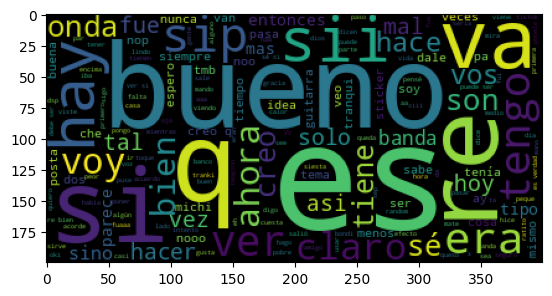

In [ ]:
print("Valu world cloud: ")
show_word_cloud(tokens[VALU_ID])

Alee world cloud: 


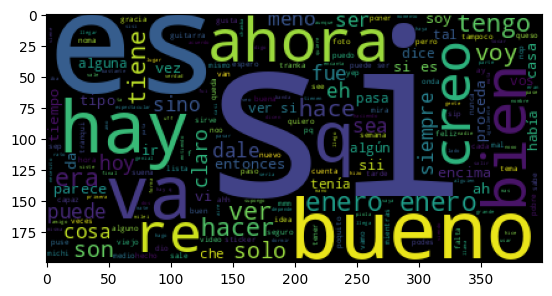

In [ ]:
print("Alee world cloud: ")
show_word_cloud(tokens[ALEE_ID])